In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

In [2]:
data_dir = Path('data')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)

In [3]:
full_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,None
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,None
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,None
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,None
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,None


In [4]:
full_df.shape

(24649092, 19)

In [5]:
full_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [6]:
full_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,2.464909e+07,2.383912e+07,2.464909e+07,2.383912e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.464909e+07,2.383912e+07
mean,1.682583e+00,1.467983e+00,3.527101e+00,1.048557e+00,1.639707e+02,1.611703e+02,1.238331e+00,1.266778e+01,1.071846e+00,5.127966e-01,2.082027e+00,3.038690e-01,2.975556e-01,1.842175e+01,2.271167e+00
std,5.033062e-01,1.112779e+00,3.250320e+02,7.610835e-01,6.675226e+01,7.095647e+01,5.282318e-01,2.740882e+02,1.007169e+02,1.007093e+02,2.610753e+00,1.604902e+00,3.745082e-02,3.402245e+02,7.473421e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.259000e+03,-2.700000e+01,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,6.000000e+00,9.000000e+00,3.509149e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.983100e+05,5.000008e+05,5.000005e+05,1.393560e+03,9.255000e+02,3.000000e-01,1.000004e+06,3.000000e+00


In [7]:
# profile = ProfileReport(full_df, title="Pandas Profiling Report")

In [8]:
# profile.to_file("your_report.html")

In [9]:
# profile.to_notebook_iframe()

In [10]:
full_df['VendorID'].value_counts()

2    16599044
1     8004823
6       45097
5         128
Name: VendorID, dtype: int64

## Regiones donde más suben y bajan pasajeros

In [11]:
df_pickup = pd.DataFrame(
    full_df['PULocationID'].value_counts().reset_index().values, columns=['LocationID', 'count_pickup'])

In [12]:
df_dropoff = pd.DataFrame(
    full_df['DOLocationID'].value_counts().reset_index().values, columns=['LocationID', 'count_df_dropoff'])

In [13]:
pickup_dropoff = pd.merge(df_pickup, df_dropoff, on='LocationID', how='inner')

In [14]:
pickup_dropoff['total'] = pickup_dropoff['count_pickup'] + pickup_dropoff['count_pickup']

In [15]:
df_geom_ny = pd.read_csv('data/taxi_zones.csv')

In [16]:
pickup_dropoff = pd.merge(pickup_dropoff, df_geom_ny, on='LocationID', how='inner')

In [17]:
pickup_dropoff[[
    'LocationID', 'count_pickup', 'count_df_dropoff', 'total', 'zone', 'borough', 'the_geom']].head()

,LocationID,count_pickup,count_df_dropoff,total,zone,borough,the_geom
0,237,1145412,1015502,2290824,Upper East Side South,Manhattan,MULTIPOLYGON (((-73.96612747299989 40.76217929...
1,236,1089583,1126419,2179166,Upper East Side North,Manhattan,MULTIPOLYGON (((-73.95779380499984 40.77359989...
2,161,946854,843739,1893708,Midtown Center,Manhattan,MULTIPOLYGON (((-73.97534377999993 40.75529969...
3,186,862321,553455,1724642,Penn Station/Madison Sq West,Manhattan,MULTIPOLYGON (((-73.99096832799995 40.74542088...
4,162,831592,666196,1663184,Midtown East,Manhattan,MULTIPOLYGON (((-73.9712170449999 40.755193323...


In [18]:
# Map create
# https://medium.com/analytics-vidhya/mapping-indonesias-village-border-with-plotly-from-long-lat-coordinates-to-wkt-strings-975fd002326e

In [19]:
pickup_dropoff['geometry'] = gpd.GeoSeries.from_wkt(pickup_dropoff['the_geom'])

In [20]:
pickup_dropoff = gpd.GeoDataFrame(pickup_dropoff)

In [21]:
pickup_dropoff.tail()

,LocationID,count_pickup,count_df_dropoff,total,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,borough,geometry
254,176,29,236,58,176,0.151995,MULTIPOLYGON (((-74.12187198599999 40.57510757...,0.000658,Oakwood,Staten Island,"MULTIPOLYGON (((-74.12187 40.57511, -74.12187 ..."
255,111,26,318,52,111,0.059931,MULTIPOLYGON (((-73.99516890099986 40.65966952...,0.000209,Green-Wood Cemetery,Brooklyn,"MULTIPOLYGON (((-73.99517 40.65967, -73.99296 ..."
256,2,25,45,50,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
257,30,20,164,40,30,0.094510,MULTIPOLYGON (((-73.82075892499992 40.61523267...,0.000146,Broad Channel,Queens,"MULTIPOLYGON (((-73.82076 40.61523, -73.81769 ..."
258,199,11,2,22,199,0.077809,MULTIPOLYGON (((-73.88885148496313 40.79870632...,0.000289,Rikers Island,Bronx,"MULTIPOLYGON (((-73.88885 40.79871, -73.88860 ..."


(-74.28337047811293, -73.67222994897456, 40.47514452607875, 40.936503646094195)

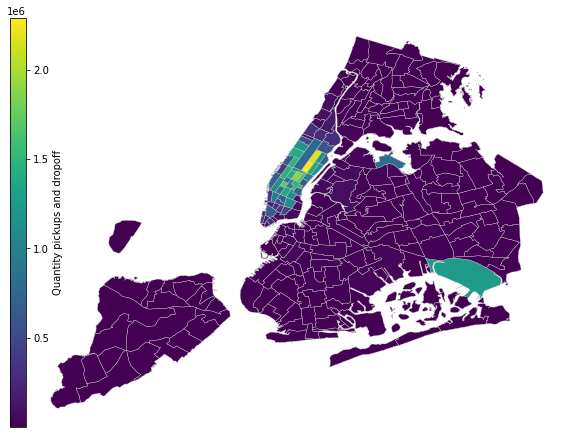

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,20))
divider = make_axes_locatable(ax)
tmpx = pickup_dropoff.copy()

#To display values
tmpx['total'] = tmpx['total'] 

#resize the colorbar
cax = divider.append_axes("left", size="3%", pad=0) 
tmpx.plot(column='total', ax=ax,cax=cax,  legend=True, 
         legend_kwds={'label': "Quantity pickups and dropoff"})

#Add some borders to the geometries
tmpx['geometry'].boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) 
ax.axis('off')

# Cuales son las horas y dias pico

In [23]:
full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].map(lambda x: x.hour)
full_df['dropoff_hour'] = full_df['tpep_dropoff_datetime'].map(lambda x: x.hour)

In [24]:
df_pickup_hour = pd.DataFrame(
    full_df['pickup_hour'].value_counts().reset_index().values, columns=['hour', 'count_pickup'])

In [25]:
df_dropoff_hour = pd.DataFrame(
    full_df['dropoff_hour'].value_counts().reset_index().values, columns=['hour', 'count_dropoff'])

In [26]:
df_hour = pd.merge(df_pickup_hour, df_dropoff_hour, on='hour', how='inner')

In [27]:
df_hour = df_hour.sort_values(by='hour').set_index('hour')

In [28]:
df_hour.head()

,count_pickup,count_dropoff
hour,,
0,537873,588741
1,372574,401178
2,253311,272493
3,189633,197220
4,161500,165075


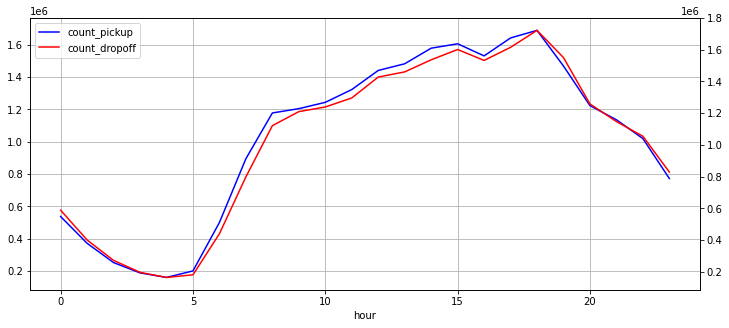

In [29]:
plt.figure(figsize=(12,5))
plt.xlabel('hour')

ax1 = df_hour.count_pickup.plot(color='blue', grid=True, label='count_pickup')
ax2 = df_hour.count_dropoff.plot(color='red', grid=True, secondary_y=True, label='count_dropoff')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [30]:
full_df['pickup_day'] = full_df['tpep_pickup_datetime'].map(lambda x: x.day)
full_df['dropoff_day'] = full_df['tpep_dropoff_datetime'].map(lambda x: x.day)

In [31]:
df_pickup_day = pd.DataFrame(
    full_df['pickup_day'].value_counts().reset_index().values, columns=['day', 'count_pickup'])

In [32]:
df_dropoff_day = pd.DataFrame(
    full_df['dropoff_day'].value_counts().reset_index().values, columns=['day', 'count_dropoff'])

In [33]:
df_day = pd.merge(df_pickup_day, df_dropoff_day, on='day', how='inner')

In [34]:
df_day = df_day.sort_values(by='day').set_index('day')

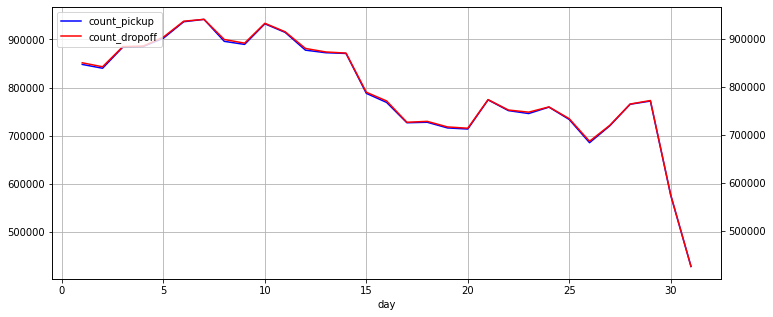

In [35]:
plt.figure(figsize=(12,5))
plt.xlabel('day')

ax1 = df_day.count_pickup.plot(color='blue', grid=True, label='count_pickup')
ax2 = df_day.count_dropoff.plot(color='red', grid=True, secondary_y=True, label='count_dropoff')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()